In [2]:
from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import svm
import sklearn
import torch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=RuntimeWarning)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [3]:
#load dataset
data=pd.read_csv('owid-covid-data.csv',parse_dates=True)
print('Shape of data',data.shape)
data.head()

Shape of data (134015, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
data_US = data[data['location']=='United States']

data_US['Date'] = pd.to_datetime(data_US['date'])

data_US = data_US.reset_index()
data_US

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Date
0,126472,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2020-01-22
1,126473,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2020-01-23
2,126474,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2020-01-24
3,126475,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2020-01-25
4,126476,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,-9227.9,-3.71,-3.11,-27.718481,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,127133,USA,North America,United States,2021-11-13,47054618.0,47499.0,80789.571,762972.0,452.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-11-13
662,127134,USA,North America,United States,2021-11-14,47079428.0,24810.0,79297.143,763092.0,120.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-11-14
663,127135,USA,North America,United States,2021-11-15,47221527.0,142099.0,83551.000,764363.0,1271.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-11-15
664,127136,USA,North America,United States,2021-11-16,47309008.0,87481.0,84614.143,765811.0,1448.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-11-16


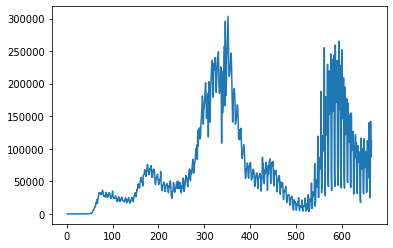

In [5]:
plt.plot(data_US['new_cases'])

In [6]:
temp = (data_US['Date'] >= '2021-07-01') & (data_US['Date'] <= '2021-10-01')
data_US = data_US.loc[temp]

In [7]:
data_US

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Date
526,126998,USA,North America,United States,2021-07-01,33759965.0,14378.0,12768.429,604534.0,286.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-07-01
527,126999,USA,North America,United States,2021-07-02,33789344.0,29379.0,13489.143,604969.0,435.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-07-02
528,127000,USA,North America,United States,2021-07-03,33794057.0,4713.0,12917.714,605051.0,82.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-07-03
529,127001,USA,North America,United States,2021-07-04,33797881.0,3824.0,12848.000,605089.0,38.0,...,24.6,NaN,2.77,78.86,0.926,661815.1,14.84,7.36,1987.939723,2021-07-04
530,127002,USA,North America,United States,2021-07-05,33806716.0,8835.0,12033.571,605211.0,122.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,127086,USA,North America,United States,2021-09-27,43158293.0,169373.0,118063.571,691580.0,2372.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-09-27
615,127087,USA,North America,United States,2021-09-28,43269671.0,111378.0,116596.286,694137.0,2557.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-09-28
616,127088,USA,North America,United States,2021-09-29,43393086.0,123415.0,115209.571,696749.0,2612.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-09-29
617,127089,USA,North America,United States,2021-09-30,43503034.0,109948.0,112849.571,699543.0,2794.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-09-30


In [8]:
data_US.reset_index(drop=True, inplace=True)
data_US

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Date
0,126998,USA,North America,United States,2021-07-01,33759965.0,14378.0,12768.429,604534.0,286.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-07-01
1,126999,USA,North America,United States,2021-07-02,33789344.0,29379.0,13489.143,604969.0,435.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-07-02
2,127000,USA,North America,United States,2021-07-03,33794057.0,4713.0,12917.714,605051.0,82.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-07-03
3,127001,USA,North America,United States,2021-07-04,33797881.0,3824.0,12848.000,605089.0,38.0,...,24.6,NaN,2.77,78.86,0.926,661815.1,14.84,7.36,1987.939723,2021-07-04
4,127002,USA,North America,United States,2021-07-05,33806716.0,8835.0,12033.571,605211.0,122.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,127086,USA,North America,United States,2021-09-27,43158293.0,169373.0,118063.571,691580.0,2372.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-09-27
89,127087,USA,North America,United States,2021-09-28,43269671.0,111378.0,116596.286,694137.0,2557.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-09-28
90,127088,USA,North America,United States,2021-09-29,43393086.0,123415.0,115209.571,696749.0,2612.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-09-29
91,127089,USA,North America,United States,2021-09-30,43503034.0,109948.0,112849.571,699543.0,2794.0,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2021-09-30


We want to make the time series stationary to make it not depend on the time at which the series is analyzed. A non stationary time series can have trend or/and seasonality. These factors affect the values of time series. So it is necessary to remove them before we start the time series analysis. To make a non-stationary time series to stationary, we can do differencing operation for stabilizing the mean of the series where we calculate the differences in a back to back manner (that is, difference between successive observations or substract past one from current observation value). This can aids in removing (or minimizing) trend and seasonality.

Sometime, Occasionally first order differencing of time series may not remove all the trend and seasonality and and it is required to difference the data one more time (second order differencing of time series) to get a stationary time series.

After analyzing Autocorrelation plot, I am doing second order differencing to make the time series stationary.

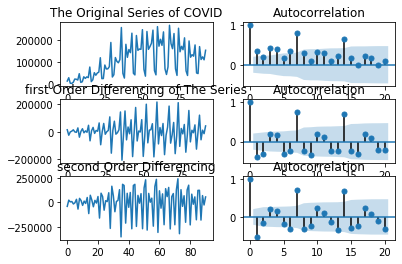

In [11]:
# Original Series
figs, axes = plt.subplots(3, 2)
axes[0, 0].plot(data_US['new_cases']); axes[0, 0].set_title('The Original Series of COVID')
plot_acf(data_US['new_cases'], ax=axes[0, 1])

# The first Differencing
axes[1, 0].plot(np.diff(data_US['new_cases'])); axes[1, 0].set_title('first Order Differencing of The Series')
plot_acf(np.diff(data_US['new_cases']), ax=axes[1, 1])
diff_val = np.diff(data_US['new_cases'])

# The second Differencing
axes[2, 0].plot(np.diff(diff_val)); axes[2, 0].set_title('second Order Differencing')
plot_acf(np.diff(diff_val), ax=axes[2, 1])
diff_2val = np.diff(diff_val)

An ARIMA model without seasonality is represented as ARIMA(p,d,q), p is the count of AR terms, d is the count of differences needed (in this example, it is assumed d=2 is needed)to make the time series as a stationary one and q is the count of MA terms. Then we are finding the best ARIMA model to fit. Akaike’s Information Criterion (AIC), is observed here to identify the order of the best ARIMA model.

To find the optimal value of differencing (we assumed d=2 previously by plotting the time series), we can use Augmented Dickey–Fuller (ADF) test.

In [12]:
# code source: https://www.analyticsvidhya.com/blog/2021/04/time-series-analysis-forecast-covid-19-vaccination-rate/

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pmd
md = pmd.auto_arima(data_US['new_cases'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
max_p=4, max_q=4, # maximum p and q
m=1, # frequency of series
d=None, 
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(md.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2308.137, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2355.410, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2343.263, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2306.814, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2353.444, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2313.481, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2305.917, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2299.742, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2295.920, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2315.083, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2297.734, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2308.859, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2296.565, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2294.391, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]          

The best model chosen is : ARIMA (p,d,q) = ARIMA(3,1,4).

To our surprise, first order differencing has to be performed for making the time series stationary in this scenario.

As the next step, perform diagnostic check for the residual as given below:

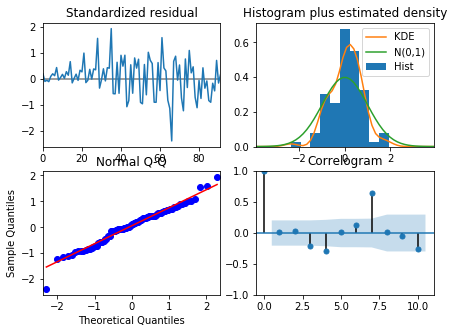

In [13]:
md.plot_diagnostics(figsize=(7,5))
plt.show()

Then we can forecast the new case now.

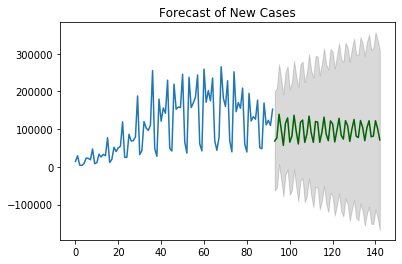

In [15]:
# code source: https://www.analyticsvidhya.com/blog/2021/04/time-series-analysis-forecast-covid-19-vaccination-rate/

# Forecast
periods = 50
f_c, conf = md.predict(n_periods=periods, return_conf_int=True)
index_c = np.arange(len(data_US['new_cases']), len(data_US['new_cases'])+periods)

# make series for plotting purpose
series = pd.Series(f_c, index=index_c)
lowseries = pd.Series(conf[:, 0], index=index_c)
uppseries = pd.Series(conf[:, 1], index=index_c)

# Plot
plt.plot(data_US['new_cases'])
plt.plot(series, color='darkgreen')
plt.fill_between(lowseries.index,lowseries,uppseries,color='k', alpha=.15)
plt.title("Forecast of New Cases")
plt.show()

There may be many factors or features affecting the new cases in a country. This simple time series analysis by ARIMA forecasting equation is only considering a linear relationship between the days and the new case in which the predictors comprised of lags of the dependent feature (here new case) and lags of the forecasting errors.